# Keyword Prediction Evaluation - Glove models comparison
Copyright (C) 2021 ServiceNow, Inc.

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the the model results...

In [7]:
import sys
sys.path.append('..')

In [8]:
OUTPUT_FOLDER_GLOVE = '/nrcan_p2/data/07_model_output/keyword_prediction_glove' 

In [9]:
import pandas as pd
def convert_eval_data_to_df(eval_data):
    numeric_metrics = []
    non_numeric_metrics = []
    for split in eval_data.keys():
        #print(eval_data[split])
        split_data = pd.DataFrame(eval_data[split])
        # HACK
        #split_data = pd.concat([split_data, split_data])
        #display(split_data.dtypes)
        split_data = split_data.transpose()#.astype('float', errors='ignore')
        #display(type(split_data.transpose().iloc[0].eval_loss))
        for column in split_data.columns:
            split_data[column] = split_data[column].astype('float', errors='ignore')
        #split_data = split_data.rename(index=['rerun'])
        #split_data_numeric = split_data.describe().transpose()
        split_data_numeric = split_data.select_dtypes(include='number')
        split_data_numeric['split'] = split
        split_data_numeric.set_index('split', append=True, inplace=True)

        split_data_nonnumeric = split_data.select_dtypes(exclude='number')
        split_data_nonnumeric['split'] = split
        split_data_nonnumeric.set_index('split', append=True, inplace=True)
        split_data_nonnumeric = split_data_nonnumeric.reset_index(drop=False)
        split_data_nonnumeric = split_data_nonnumeric.rename(columns={'level_0': 'rerun'})
        #display(split_data_nonnumeric)
        non_numeric_metrics.append(split_data_nonnumeric)

        #display(split_data_numeric)
        numeric_metrics.append(split_data_numeric)


    numeric_metrics = pd.concat(numeric_metrics)

    non_numeric_metrics = pd.concat(non_numeric_metrics)
    
    return numeric_metrics, non_numeric_metrics

In [10]:
import pandas as pd 

glove_eval_data = pd.read_parquet('/nrcan_p2/workspace/sraimondo/nrcan_p2_5/glove_eval_data.parquet')
#display(glove_eval_data)

run_data = pd.read_csv('/nrcan_p2/workspace/sraimondo/nrcan_p2_5/glove_runs_log.csv')
#display(run_data)

eval_data = pd.merge(run_data, glove_eval_data, left_on='path', right_on='run_dir')
display(eval_data)

,Unnamed: 0,date,path,finished,data_dir,output_dir,clf_initializer,n_splits,n_rerun,keyword_text_col,...,train_macro-recall,train_macro-fb1,train_support,train_sample-precision,train_sample-recall,train_sample-fb1,train_confusion_matrix,split,nrun,run_dir
0,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.686861,0.675225,"[1839, 1644, 1452, 1160, 1057]","[0.7041954328199681, 0.6703812316715543, 0.668...","[0.7210440456769984, 0.6952554744525548, 0.683...","[0.7125201504567438, 0.6825918184532697, 0.675...","[[[5572, 557], [513, 1326]], [[5762, 562], [50...",0,0,/nrcan_p2/data/07_model_output/keyword_predict...
1,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.676332,0.673192,"[1839, 1644, 1452, 1160, 1057]","[0.7118834080717489, 0.6926889714993805, 0.670...","[0.6905927134312126, 0.6800486618004866, 0.690...","[0.7010764559757107, 0.6863106200122775, 0.680...","[[[5615, 514], [569, 1270]], [[5828, 496], [52...",0,1,/nrcan_p2/data/07_model_output/keyword_predict...
2,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.676372,0.676862,"[1839, 1644, 1452, 1160, 1057]","[0.708171206225681, 0.6900479616306955, 0.6680...","[0.6927678085916259, 0.7001216545012166, 0.672...","[0.7003848268279275, 0.695048309178744, 0.6700...","[[[5604, 525], [565, 1274]], [[5807, 517], [49...",0,2,/nrcan_p2/data/07_model_output/keyword_predict...
3,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.688948,0.682666,"[1993, 1426, 1518, 1212, 1269]","[0.7138671875, 0.6500332667997338, 0.687460216...","[0.733567486201706, 0.685133239831697, 0.71146...","[0.7235832714674587, 0.6671218846022533, 0.699...","[[[5393, 586], [531, 1462]], [[6020, 526], [44...",1,0,/nrcan_p2/data/07_model_output/keyword_predict...
4,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.704445,0.697941,"[1993, 1426, 1518, 1212, 1269]","[0.742051282051282, 0.6816053511705685, 0.6964...","[0.7260411440040141, 0.7145862552594671, 0.672...","[0.7339589145320822, 0.6977062649777475, 0.684...","[[[5476, 503], [546, 1447]], [[6070, 476], [40...",1,1,/nrcan_p2/data/07_model_output/keyword_predict...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11218,830,2021-03-08 03:28:47.763005,/nrcan_p2/data/07_model_output/keyword_predict...,False,NaN,NaN,NaN,NaN,NaN,NaN,...,0.957324,0.868571,"[1824, 1634, 1439, 1339, 1156, 1053, 1387, 124...","[0.8690596562184024, 0.8182784272051009, 0.840...","[0.9424342105263158, 0.9424724602203183, 0.967...","[0.9042609153077328, 0.875995449374289, 0.8992...","[[[5834, 259], [105, 1719]], [[5941, 342], [94...",0,1,/nrcan_p2/data/07_model_output/keyword_predict...
11219,830,2021-03-08 03:28:47.763005,/nrcan_p2/data/07_model_output/keyword_predict...,False,NaN,NaN,NaN,NaN,NaN,NaN,...,0.948839,0.873632,"[1824, 1634, 1439, 1339, 1156, 1053, 1387, 124...","[0.8007681228996639, 0.8446170921198668, 0.813...","[0.9144736842105263, 0.9314565483476133, 0.956...","[0.8538520604044023, 0.8859138533178114, 0.879...","[[[5678, 415], [156, 1668]], [[6003, 280], [11...",0,2,/nrcan_p2/data/07_model_output/keyword_predict...
11220,830,2021-03-08 03:28:47.763005,/nrcan_p2/data/07_model_output/ke

Only keep the finished runs

In [11]:
eval_data = eval_data[eval_data.finished == True]
display(eval_data)

,Unnamed: 0,date,path,finished,data_dir,output_dir,clf_initializer,n_splits,n_rerun,keyword_text_col,...,train_macro-recall,train_macro-fb1,train_support,train_sample-precision,train_sample-recall,train_sample-fb1,train_confusion_matrix,split,nrun,run_dir
0,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.686861,0.675225,"[1839, 1644, 1452, 1160, 1057]","[0.7041954328199681, 0.6703812316715543, 0.668...","[0.7210440456769984, 0.6952554744525548, 0.683...","[0.7125201504567438, 0.6825918184532697, 0.675...","[[[5572, 557], [513, 1326]], [[5762, 562], [50...",0,0,/nrcan_p2/data/07_model_output/keyword_predict...
1,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.676332,0.673192,"[1839, 1644, 1452, 1160, 1057]","[0.7118834080717489, 0.6926889714993805, 0.670...","[0.6905927134312126, 0.6800486618004866, 0.690...","[0.7010764559757107, 0.6863106200122775, 0.680...","[[[5615, 514], [569, 1270]], [[5828, 496], [52...",0,1,/nrcan_p2/data/07_model_output/keyword_predict...
2,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.676372,0.676862,"[1839, 1644, 1452, 1160, 1057]","[0.708171206225681, 0.6900479616306955, 0.6680...","[0.6927678085916259, 0.7001216545012166, 0.672...","[0.7003848268279275, 0.695048309178744, 0.6700...","[[[5604, 525], [565, 1274]], [[5807, 517], [49...",0,2,/nrcan_p2/data/07_model_output/keyword_predict...
3,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.688948,0.682666,"[1993, 1426, 1518, 1212, 1269]","[0.7138671875, 0.6500332667997338, 0.687460216...","[0.733567486201706, 0.685133239831697, 0.71146...","[0.7235832714674587, 0.6671218846022533, 0.699...","[[[5393, 586], [531, 1462]], [[6020, 526], [44...",1,0,/nrcan_p2/data/07_model_output/keyword_predict...
4,0,2021-03-07 05:23:39.817729,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.704445,0.697941,"[1993, 1426, 1518, 1212, 1269]","[0.742051282051282, 0.6816053511705685, 0.6964...","[0.7260411440040141, 0.7145862552594671, 0.672...","[0.7339589145320822, 0.6977062649777475, 0.684...","[[[5476, 503], [546, 1447]], [[6070, 476], [40...",1,1,/nrcan_p2/data/07_model_output/keyword_predict...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10615,707,2021-03-08 03:30:32.635421,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.677268,0.329652,"[248, 179, 143, 141, 135, 139, 120, 137, 107, ...","[0.38320209973753283, 0.2577696526508227, 0.21...","[0.5887096774193549, 0.7877094972067039, 0.650...","[0.46422893481717015, 0.3884297520661157, 0.32...","[[[360, 235], [102, 146]], [[258, 406], [38, 1...",3,1,/nrcan_p2/data/07_model_output/keyword_predict...
10616,707,2021-03-08 03:30:32.635421,/nrcan_p2/data/07_model_output/keyword_predict...,True,/nrcan_p2/data/03_primary/keyword_prediction/s...,/nrcan_p2/data/07_model_output/keyword_predict...,rf_initializer,5.0,3.0,sentence1,...,0.785977,0.282456,"[248, 179, 143, 141, 135, 139, 120, 137, 107, ...","[0.4583333333333333, 0.23580034423407917, 0.18...","[0.1774193548387097, 0.7653631284916201, 0.909...","[0.25581395

In [12]:
eval_data.columns

Index(['Unnamed: 0', 'date', 'path', 'finished', 'data_dir', 'output_dir',
       'clf_initializer', 'n_splits', 'n_rerun', 'keyword_text_col',
       'label_col', 'keyword_cat_col', 'task', 'use_class_weight',
       'embedding_model_path', 'njobs', 'use_multioutput_wrapper',
       'vectorization_method', 'data_infos', 'data_task', 'data_subject',
       'data_text', 'data_pipeline', 'eval_accuracy', 'eval_micro-precision',
       'eval_micro-recall', 'eval_micro-fb1', 'eval_macro-precision',
       'eval_macro-recall', 'eval_macro-fb1', 'eval_support',
       'eval_sample-precision', 'eval_sample-recall', 'eval_sample-fb1',
       'eval_confusion_matrix', 'train_accuracy', 'train_micro-precision',
       'train_micro-recall', 'train_micro-fb1', 'train_macro-precision',
       'train_macro-recall', 'train_macro-fb1', 'train_support',
       'train_sample-precision', 'train_sample-recall', 'train_sample-fb1',
       'train_confusion_matrix', 'split', 'nrun', 'run_dir'],
      dtype='o

Double check the contents are as we expect...

In [13]:
eval_data.task.value_counts()

MULTICLASS    10620
Name: task, dtype: int64

In [14]:
eval_data.data_subject.value_counts()

subject_5           4110
subject_30          3270
subject_desc_t10    3240
Name: data_subject, dtype: int64

In [16]:
eval_data.data_text.value_counts()

desc_en_en_50_3000    5520
title_merged          5100
Name: data_text, dtype: int64

In [17]:
eval_data.data_pipeline.value_counts()

SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE    4950
PIPELINE_GLOVE_90_POSTPIPE_GLOVE          2010
PIPELINE_GLOVE_80_POSTPIPE_GLOVE          1905
PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE        1755
Name: data_pipeline, dtype: int64

In [18]:
eval_data.embedding_model_path.value_counts()

/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-28-2021-19-50-45/vectors.txt    1410
/nrcan_p2/data/06_models/glove/dataset_A_full_02-24-2021-23-00-02/vectors.txt           810
/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-28-2021-19-49-35/vectors.txt        795
/nrcan_p2/data/06_models/glove/dataset_A_full_02-01-2021-03-52-42/vectors.txt           735
/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-28-2021-20-07-54/vectors.txt        675
/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-28-2021-20-08-52/vectors.txt     675
/nrcan_p2/data/06_models/glove_pretrained/glove.6B.50d.txt                              660
/nrcan_p2/data/06_models/glove/dataset_A_full_02-24-2021-23-19-15/vectors.txt           660
/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-28-2021-19-54-45/vectors.txt     645
/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-25-2021-01-56-02/vectors.txt     630
/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-28-2021-19-57-01/vectors.txt

In [19]:
eval_data.use_class_weight.value_counts()

False    5535
True     5085
Name: use_class_weight, dtype: int64

In [20]:
eval_data.clf_initializer.value_counts()

rf_initializer     5805
mlp_initializer    4815
Name: clf_initializer, dtype: int64

## Remove duplicates

In [24]:
duplicates = eval_data.duplicated(['path', 'split', 'nrun', 
                   'clf_initializer', 'embedding_model_path',
                   'data_text', 'data_subject', 'data_pipeline', 'use_multioutput_wrapper', 'use_class_weight'], keep=False)

duplicates.sum()

0

## Get the model mappings

In [87]:
glove_eval_data = eval_data.reset_index() 

glove_eval_data['classifier'] = glove_eval_data.clf_initializer.apply(lambda x:
        'RF' if 'rf' in x
    else 'MLP' if 'mlp' in x
    else 'other'                                                                                                    
    )

glove_eval_data['input'] = glove_eval_data.data_text.apply(lambda x:
        'title' if 'title' in x
    else 'description' if 'desc_en_en_50_3000' in x
    else 'other'                                                                                                    
    )

glove_eval_data['n_subjects'] = glove_eval_data.data_subject.apply(lambda x:
        '5' if '5' in x
    else '10' if '10' in x
    else '30' if '30' in x
    else 'other'                                                                                                    
    )


glove_eval_data['pipeline'] = glove_eval_data[['data_pipeline', 'embedding_model_path']].apply(lambda row:
        'pretrained' if '6B' in row['embedding_model_path']
    else    'v1' if 'SIMPLE' in row.data_pipeline
    else 'PLUS' if 'PLUS' in row.data_pipeline
    else '80' if '80' in row.data_pipeline
    else '90' if '90' in row.data_pipeline
    else 'other'                                                                                                    
    , axis=1)

glove_eval_data['dataset'] = glove_eval_data.embedding_model_path.apply(lambda x:
        'pretrained' if '6B' in x
    else 'A+B+D' if 'dD' in x
    else 'A+B' if 'dB' in x
    else 'A' if 'dA' in x
    else 'other'                                                                                                    
    )


glove_eval_data['dim'] = glove_eval_data.embedding_model_path.apply(lambda x: 
    50 if x in ["/nrcan_p2/data/06_models/glove_pretrained/glove.6B.50d.txt",
    "/nrcan_p2/data/06_models/glove/dataset_A_full_02-01-2021-03-52-42/vectors.txt", #v1 A
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-01-2021-03-49-47/vectors.txt", #v1 A + B
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-16-2021-18-12-27/vectors.txt", #v1 A + B + D
     "/nrcan_p2/data/06_models/glove/dataset_A_full_02-23-2021-02-46-38", #80 A
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-23-2021-15-33-49", #80 A + B
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-23-2021-02-56-14",#80 A + B + D
     "/nrcan_p2/data/06_models/glove/dataset_A_full_02-23-2021-02-47-53/vectors.txt", # 90 A
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-23-2021-02-43-30/vectors.txt", # 90 A + B
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-23-2021-02-54-08/vectors.txt", # 90 A + B + D
     "/nrcan_p2/data/06_models/glove/dataset_A_full_02-23-2021-02-49-19/vectors.txt", # PLUS A
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-23-2021-15-36-31/vectors.txt", # PLUS A + B
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-23-2021-02-52-50/vectors.txt", # PLUS A + B + D
               ] else 300 if x in 
    [
     "/nrcan_p2/data/06_models/glove_pretrained/glove.6B.300d.txt", # 300d
    "/nrcan_p2/data/06_models/glove/dataset_A_full_02-24-2021-23-00-02/vectors.txt", # v1 A 300d
    "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-28-2021-19-49-35/vectors.txt", # v1 A + B 300d <- subj 30 t10 and all mlp
    "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-28-2021-19-50-45/vectors.txt", # v1 A + B + D 300d <-- subj 30, t10 and all mlp
     "/nrcan_p2/data/06_models/glove/dataset_A_full_02-24-2021-18-56-28/vectors.txt", # 80 A 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-28-2021-19-57-01/vectors.txt", # 80 A + B 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-28-2021-19-54-45/vectors.txt", # 80 A + B + D 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_02-24-2021-23-19-15/vectors.txt", # 90 A 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-28-2021-20-07-54/vectors.txt", # 90 A + B 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-28-2021-20-08-52/vectors.txt", # 90 A + B + D 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_02-24-2021-18-40-40/vectors.txt", # PLUS A 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_02-28-2021-20-15-12/vectors.txt", # PLUS A + B 300d
     "/nrcan_p2/data/06_models/glove/dataset_A_full_dB_dD_02-25-2021-01-56-02/vectors.txt", # PLUS A + B + D 300d                                                                                                                                 
    ] else None
)

## Group by and avg across nrun

In [89]:
glove_eval_data.dim.value_counts()

300    9150
50     1470
Name: dim, dtype: int64

In [109]:
glove_eval_data_avg_across_runs = glove_eval_data.groupby(['path', 'split', #'nrun', 
                   'clf_initializer', 'embedding_model_path', 'dim', 'input',
                    'classifier', 'n_subjects', 'pipeline', 'dataset',
                   'data_text', 'data_subject', 'data_pipeline', 
                    'use_multioutput_wrapper', 'use_class_weight']).mean()

glove_eval_data_avg_across_runs

index  \
path                                               split clf_initializer embedding_model_path                               dim input       classifier n_subjects pipeline   dataset    data_text          data_subject     data_pipeline                          use_multioutput_wrapper use_class_weight          
/nrcan_p2/data/07_model_output/keyword_predicti... 0     rf_initializer  /nrcan_p2/data/06_models/glove_pretrained/glove... 300 title       RF         5          pretrained pretrained title_merged       subject_5        SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE False                   False                 1   
                                                   1     rf_initializer  /nrcan_p2/data/06_models/glove_pretrained/glove... 300 title       RF         5          pretrained pretrained title_merged       subject_5        SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE False                   False                 4   
                                                   2     rf_initializer  /nrcan_p2/data/06_models/glove_pretrained/glove... 300 title       RF         5          pretrained pretrained title_merged       subject_5        SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE False                   False                 7   
                                                   3     rf_initializer  /nrcan_p2/data/06_models/glove_pretrained/glove... 300 title       RF         5          pretrained pretrained title_merged       subject_5        SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE False                   False                10   
                                                   4     rf_initializer  /nrcan_p2/data/06_models/glove_pretrained/glove... 300 title       RF         5          pretrained pretrained title_merged       subject_5        SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE False                   False                13   
...                                                                                                                                                                                                                                                                                                            ...   
/nrcan_p2/data/07_model_output/keyword_predicti... 0     rf_initializer  /nrcan_p2/data/06_models/glove/dataset_A_full_d... 300 description RF         10         PLUS       A+B+D      desc_en_en_50_3000 subject_desc_t10 PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE     True                    True              10606   
                                                   1     rf_initializer  /nrcan_p2/data/06_models/glove/dataset_A_full_d... 300 description RF         10         PLUS       A+B+D      desc_en_en_50_3000 subject_desc_t10 PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE     True                    True              10609   
                                                   2     rf_initializer  /nrcan_p2/data/06_models/glove/dataset_A_full_d... 300 description RF         10         PLUS       A+B+D      desc_en_en_50_3000 subject_desc_t10 PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE     True                    True              10612   
                                                   3     rf_initializer  /nrcan_p2/data/06_models/glove/dataset_A_full_d... 300 description RF         10         PLUS       A+B+D      desc_en_en_50_3000 subject_desc_t10 PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE     True                    True              10615   
                                                   4     rf_initializer  /nrcan_p2/data/06_models/glove/dataset_A_full_d... 300 description RF         10         PLUS       A+B+D      desc_en_en_50_3000 subject_desc_t10 PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE     True                    True              10618   

                                                                                                                                                                                                                                                                              

In [110]:
glove_eval_data_avg_across_runs = glove_eval_data_avg_across_runs.reset_index()

## Macro-fb1 distribution

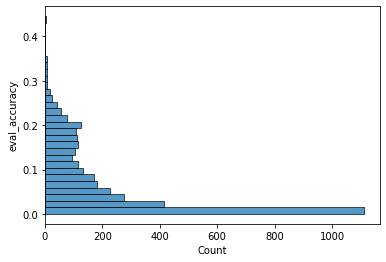

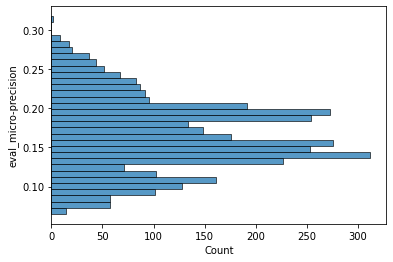

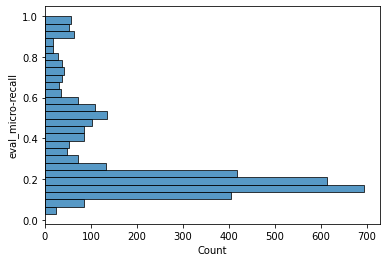

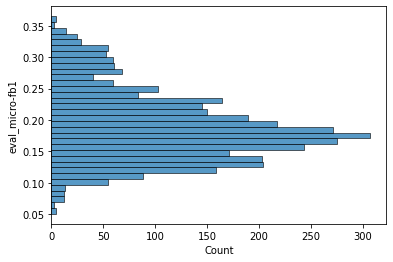

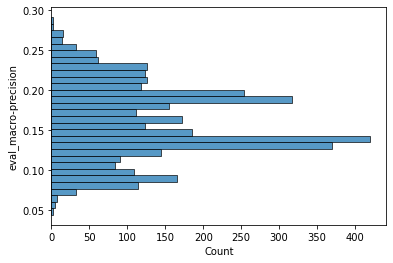

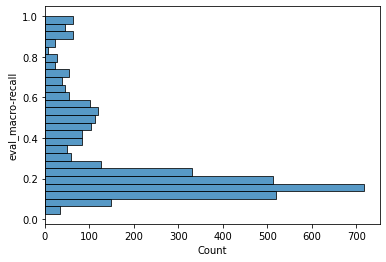

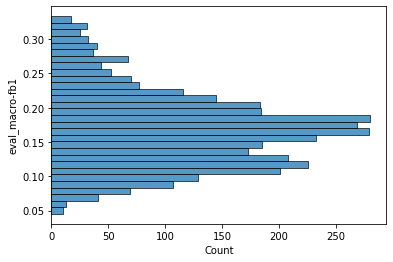

In [98]:
x = glove_eval_data_avg_across_runs
for col in x.filter(regex='eval_'):
    sns.histplot(data=x, y=col)
    plt.show()

In [99]:
glove_eval_data_avg_across_runs

,path,split,clf_initializer,embedding_model_path,dim,data_text,data_subject,data_pipeline,use_multioutput_wrapper,use_class_weight,...,eval_macro-recall,eval_macro-fb1,train_accuracy,train_micro-precision,train_micro-recall,train_micro-fb1,train_macro-precision,train_macro-recall,train_macro-fb1,nrun
0,/nrcan_p2/data/07_model_output/keyword_predict...,0,rf_initializer,/nrcan_p2/data/06_models/glove_pretrained/glov...,300,title_merged,subject_5,SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE,False,False,...,0.198134,0.184543,0.688420,0.675126,0.682886,0.678945,0.670691,0.679855,0.675093,1
1,/nrcan_p2/data/07_model_output/keyword_predict...,1,rf_initializer,/nrcan_p2/data/06_models/glove_pretrained/glov...,300,title_merged,subject_5,SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE,False,False,...,0.217433,0.182152,0.692214,0.688400,0.701312,0.694794,0.684140,0.698377,0.691000,1
2,/nrcan_p2/data/07_model_output/keyword_predict...,2,rf_initializer,/nrcan_p2/data/06_models/glove_pretrained/glov...,300,title_merged,subject_5,SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE,False,False,...,0.186846,0.205950,0.705098,0.685031,0.694399,0.689671,0.681930,0.690928,0.686279,1
3,/nrcan_p2/data/07_model_output/keyword_predict...,3,rf_initializer,/nrcan_p2/data/06_models/glove_pretrained/glov...,300,title_merged,subject_5,SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE,False,False,...,0.183967,0.184784,0.692890,0.685105,0.693684,0.689355,0.683121,0.691434,0.687199,1
4,/nrcan_p2/data/07_model_output/keyword_predict...,4,rf_initializer,/nrcan_p2/data/06_models/glove_pretrained/glov...,300,title_merged,subject_5,SIMPLE_PIPELINE_GLOVE_3_POSTPIPE_GLOVE,False,False,...,0.213136,0.162629,0.684681,0.693991,0.702857,0.698392,0.691976,0.700815,0.696306,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,/nrcan_p2/data/07_model_output/keyword_predict...,0,rf_initializer,/nrcan_p2/data/06_models/glove/dataset_A_full_...,300,desc_en_en_50_3000,subject_desc_t10,PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE,True,True,...,0.695287,0.171218,0.000000,0.210235,0.737139,0.326572,0.219915,0.741430,0.315933,1
3536,/nrcan_p2/data/07_model_output/keyword_predict...,1,rf_initializer,/nrcan_p2/data/06_models/glove/dataset_A_full_...,300,desc_en_en_50_3000,subject_desc_t10,PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE,True,True,...,0.669211,0.202687,0.000791,0.209895,0.685881,0.320255,0.231851,0.699795,0.308517,1
3537,/nrcan_p2/data/07_model_output/keyword_predict...,2,rf_initializer,/nrcan_p2/data/06_models/glove/dataset_A_full_...,300,desc_en_en_50_3000,subject_desc_t10,PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE,True,True,...,0.457095,0.254122,0.015817,0.261016,0.655196,0.372596,0.268074,0.667468,0.369555,1
3538,/nrcan_p2/data/07_model_output/keyword_predict...,3,rf_initializer,/nrcan_p2/data/06_models/glove/dataset_A_full_...,300,desc_en_en_50_3000,subject_desc_t10,PIPELINE_GLOVE_PLUS_POSTPIPE_GLOVE,True,True,...,0.590012,0.294547,0.007513,0.212361,0.685977,0.322790,0.223890,0.704750,0.318122,1


## 50 vs 300

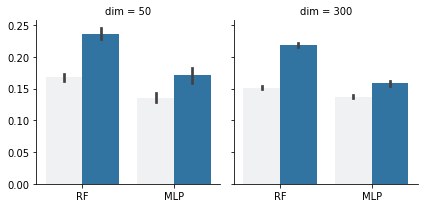

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs.reset_index()
g = sns.FacetGrid(col='dim', data=x)
g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='classifier', hue='use_class_weight')
plt.show()

## RF vs MLP

<AxesSubplot:xlabel='classifier', ylabel='eval_macro-fb1'>

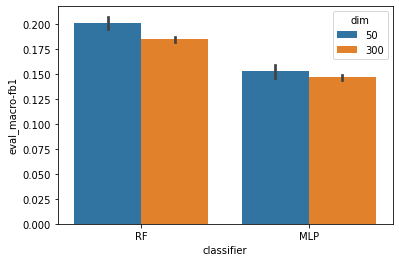

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs.reset_index()
sns.barplot(data=x, y='eval_macro-fb1', x='classifier', hue='dim')

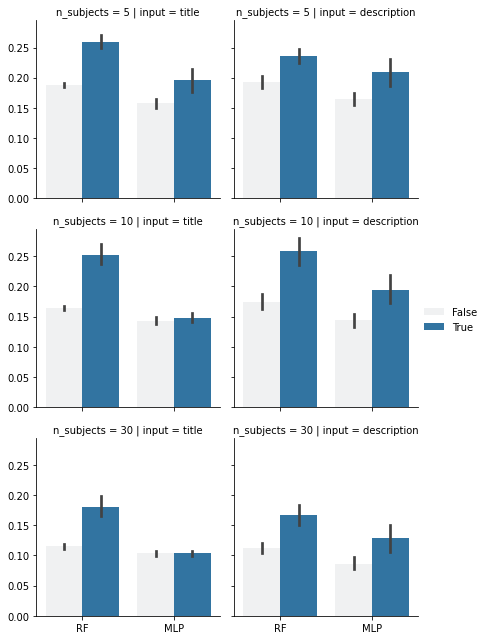

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs
x = x[x.dim == 50]
g = sns.FacetGrid(data=x, row='n_subjects', col='input', aspect=1, row_order=['5', '10', '30'])
g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='classifier', hue='use_class_weight', hue_order=[False, True], order=['RF', 'MLP'])
g.add_legend()

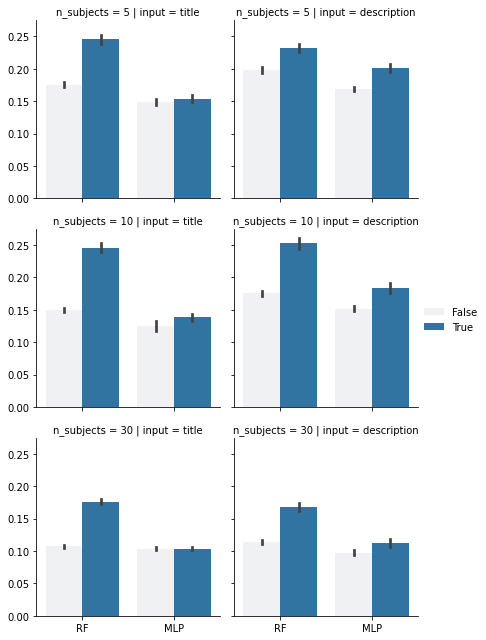

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs
x = x[x.dim == 300]
g = sns.FacetGrid(data=x, row='n_subjects', col='input', aspect=1, row_order=['5', '10', '30'])
g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='classifier', hue='use_class_weight', hue_order=[False, True], order=['RF', 'MLP'])
g.add_legend()

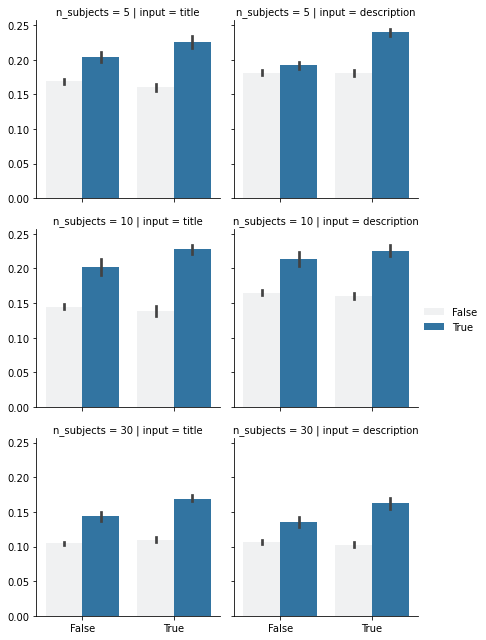

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs.reset_index()
g = sns.FacetGrid(data=x, row='n_subjects', col='input', aspect=1, row_order=['5', '10', '30'])
g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='use_multioutput_wrapper', hue='use_class_weight', 
               hue_order=[False, True], order=[False, True])
g.add_legend()

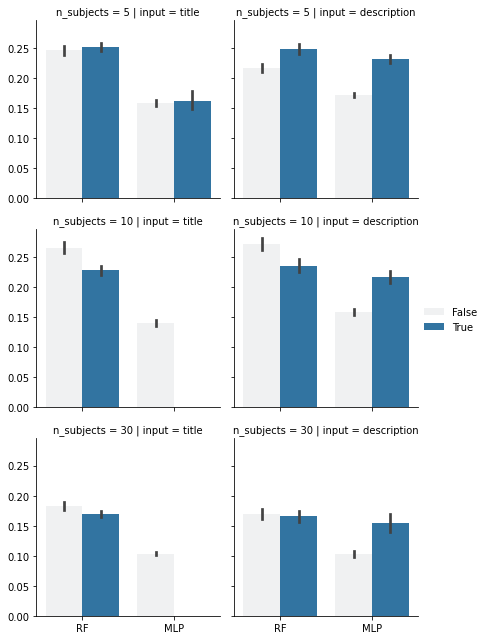

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs.reset_index()
x = x[x.use_class_weight == True]
g = sns.FacetGrid(data=x, row='n_subjects', col='input', aspect=1, row_order=['5', '10', '30'])
g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='classifier', hue='use_multioutput_wrapper', 
               hue_order=[False, True], order=['RF', 'MLP'])
g.add_legend()

## Across pipelines?

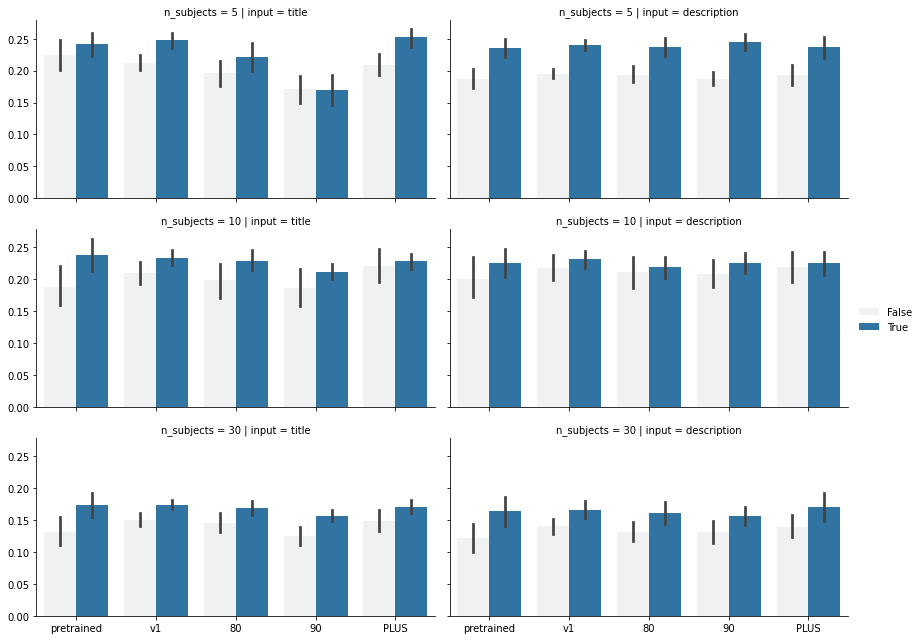

MLP


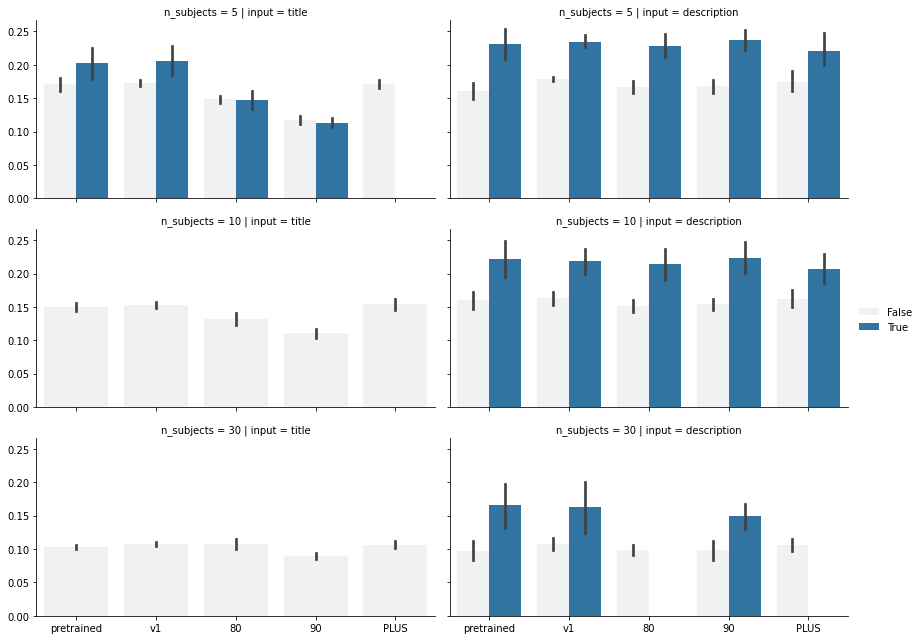

RF


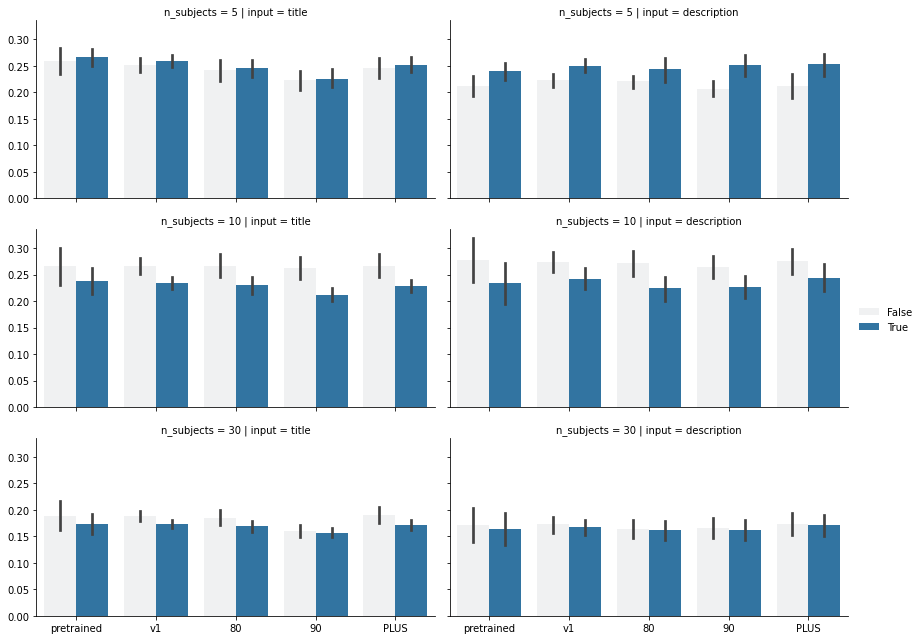

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs.reset_index()
x = x[x.use_class_weight == True]

g = sns.FacetGrid(data=x, row='n_subjects', col='input', aspect=2, row_order=['5', '10', '30'])
g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='pipeline', hue='use_multioutput_wrapper',
               order=['pretrained', 'v1', '80', '90', 'PLUS'])
g.add_legend()
plt.show()

for gname, group in x.groupby('classifier'):
    print(gname)
    g = sns.FacetGrid(data=group, row='n_subjects', col='input', aspect=2, row_order=['5', '10', '30'])
    g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='pipeline', hue='use_multioutput_wrapper',
                   order=['pretrained', 'v1', '80', '90', 'PLUS'])
    g.add_legend()
    plt.show()

## Across datasets?

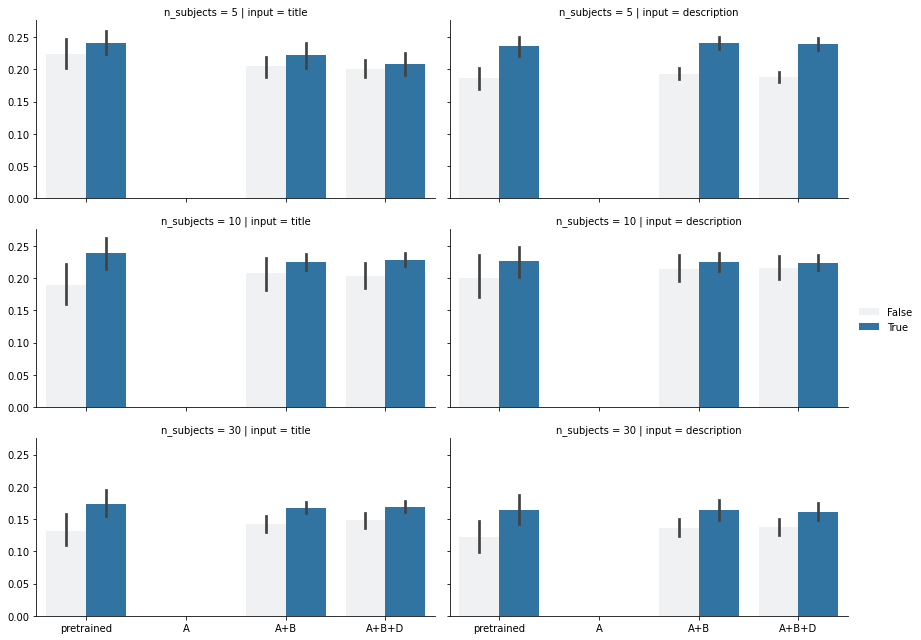

MLP


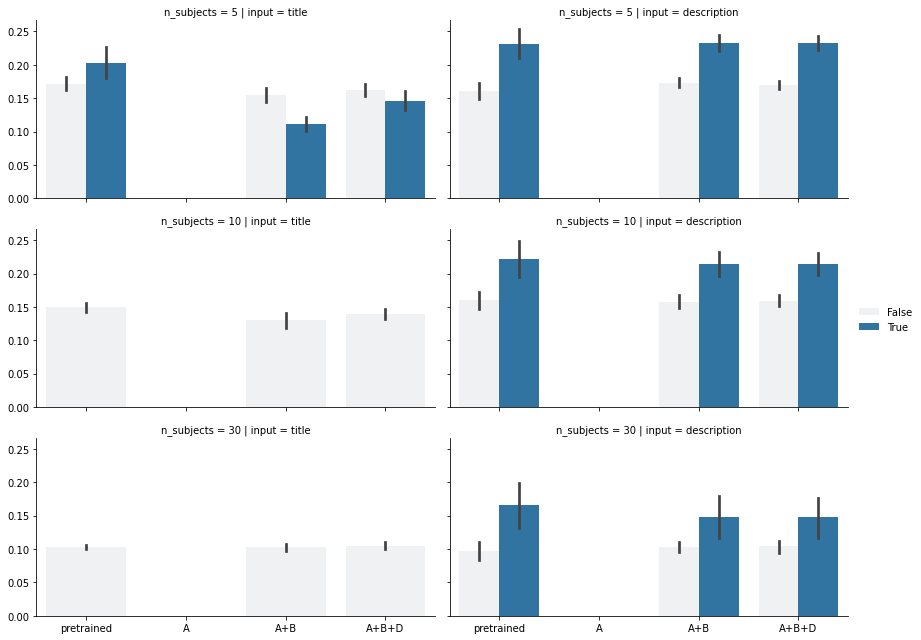

RF


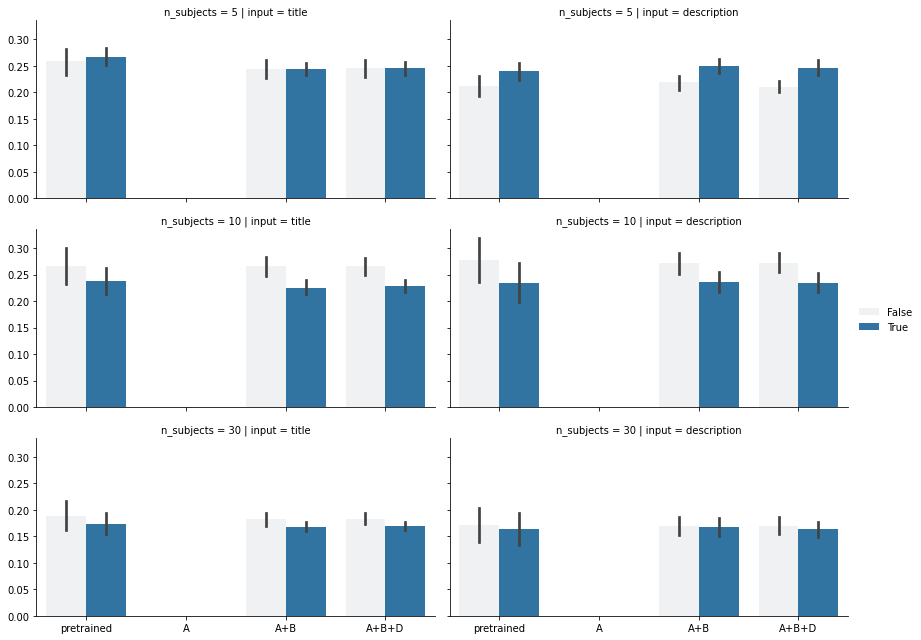

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

x = glove_eval_data_avg_across_runs.reset_index()
x = x[x.use_class_weight == True]

g = sns.FacetGrid(data=x, row='n_subjects', col='input', aspect=2, row_order=['5', '10', '30'])
g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='dataset', hue='use_multioutput_wrapper',
               order=['pretrained', 'A', 'A+B', 'A+B+D'])
g.add_legend()
plt.show()

for gname, group in x.groupby('classifier'):
    print(gname)
    g = sns.FacetGrid(data=group, row='n_subjects', col='input', aspect=2, row_order=['5', '10', '30'])
    g.map_dataframe(sns.barplot, y='eval_macro-fb1', x='dataset', hue='use_multioutput_wrapper',
                   order=['pretrained', 'A', 'A+B', 'A+B+D'])
    g.add_legend()
    plt.show()

## vs Pretrained

<AxesSubplot:xlabel='pretrained', ylabel='eval_macro-fb1'>

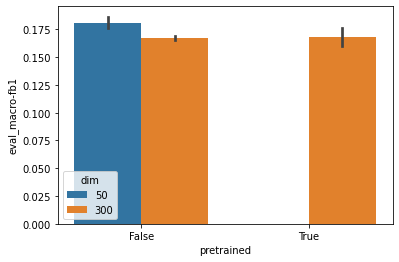

In [118]:
model='6B.300d'
x = glove_eval_data_avg_across_runs.reset_index()
x['pretrained'] = x.embedding_model_path.str.contains(model)
x = x[(x['finished'] == True) &
      (x['data_text'] != 'desc_en_en')]

sns.barplot(data=x, y='eval_macro-fb1', x='pretrained', hue='dim')


## Vs. subjects (each metric independently)

eval_micro-precision


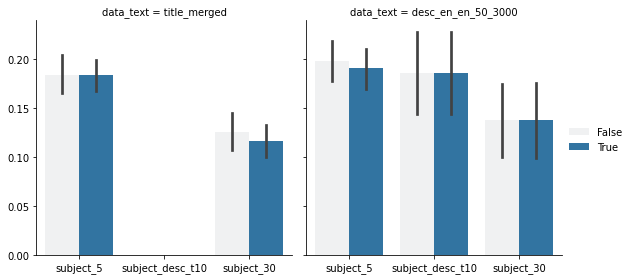

eval_micro-recall


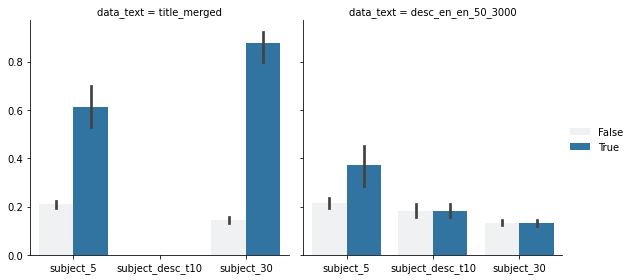

eval_micro-fb1


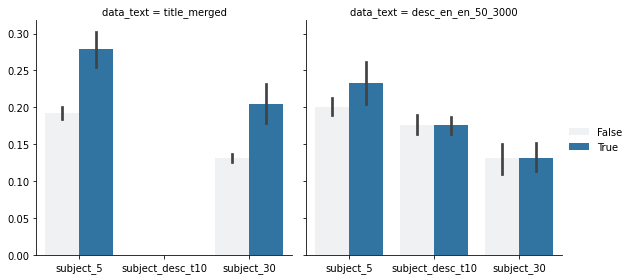

eval_macro-precision


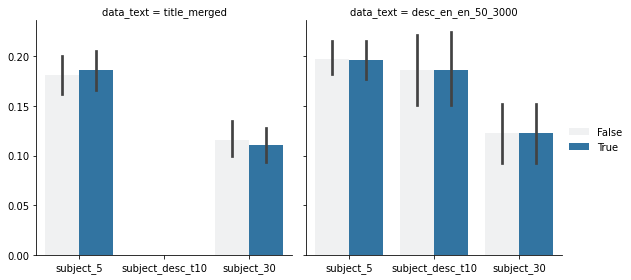

eval_macro-recall


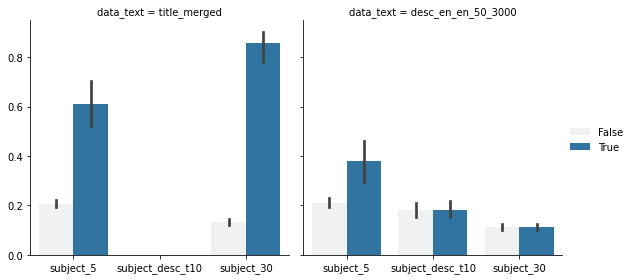

eval_macro-fb1


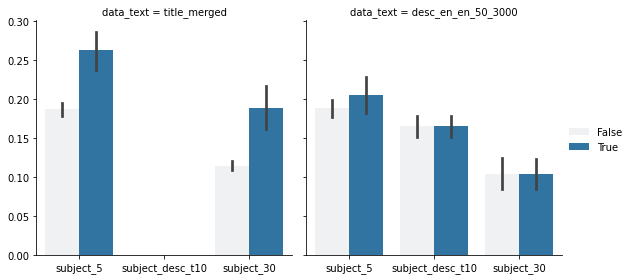

In [50]:
import seaborn as sns 
import matplotlib.pyplot as plt

model='6B.300d'
x = glove_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      (x['embedding_model_path'].str.contains(model)) &
      (x['data_text'] != 'desc_en_en')]

x = x.reset_index()

for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='data_text', height=4, aspect=1)
    g.map_dataframe(sns.barplot, x='data_subject', y=col, hue='use_class_weight', hue_order=[False, True], order=['subject_5', 'subject_desc_t10', 'subject_30'])
    g.add_legend()
    plt.show()

eval_micro-precision


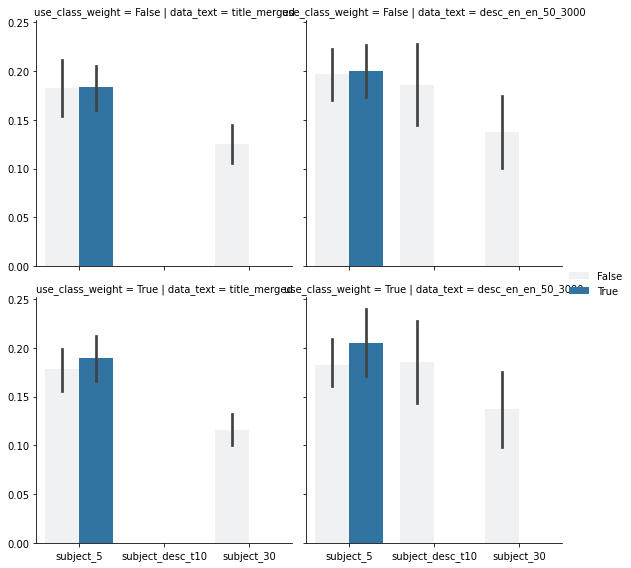

eval_micro-recall


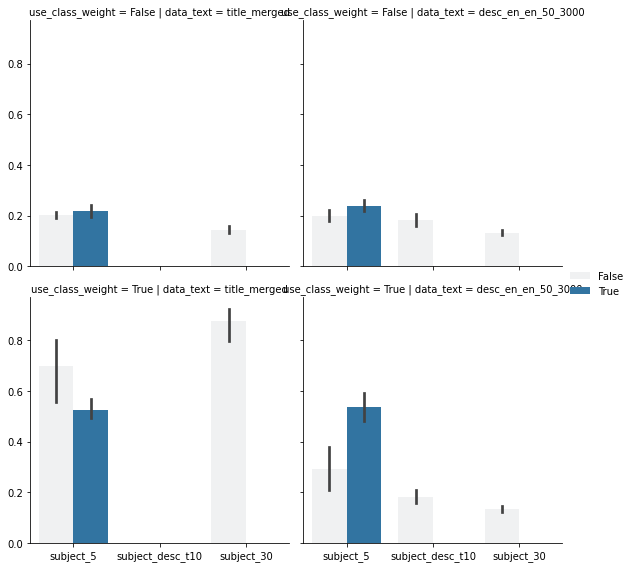

eval_micro-fb1


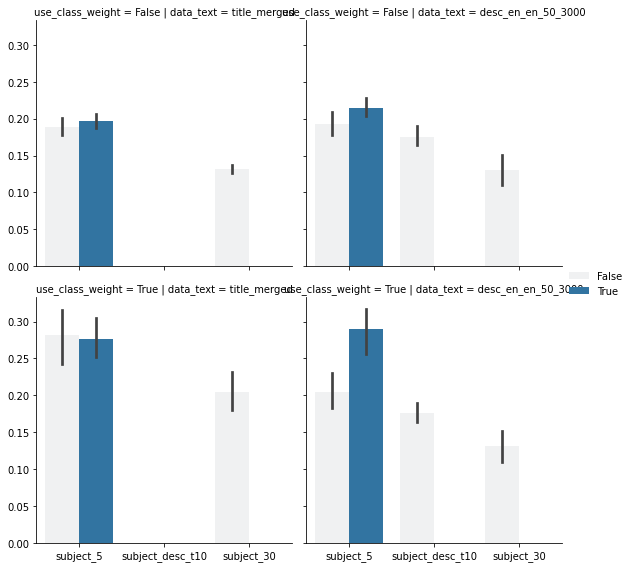

eval_macro-precision


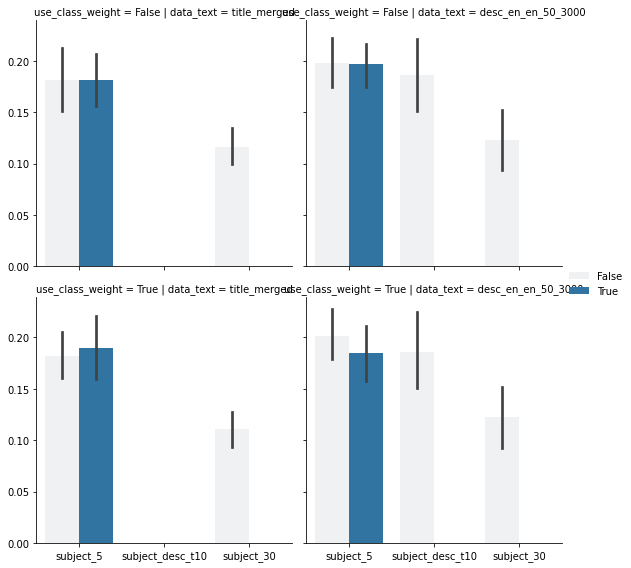

eval_macro-recall


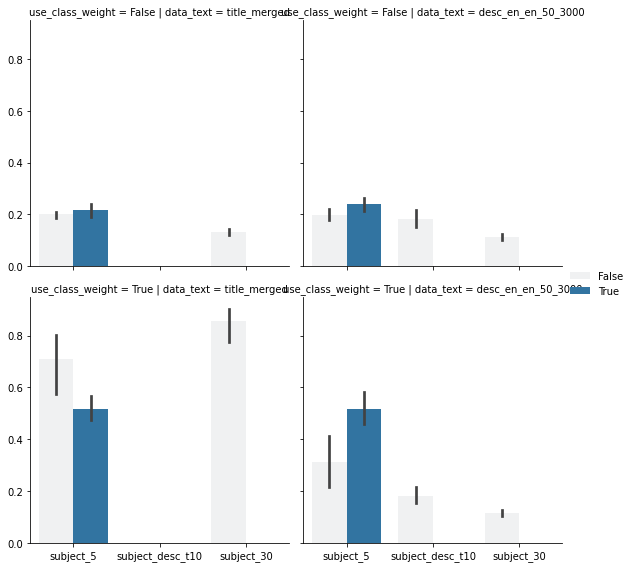

eval_macro-fb1


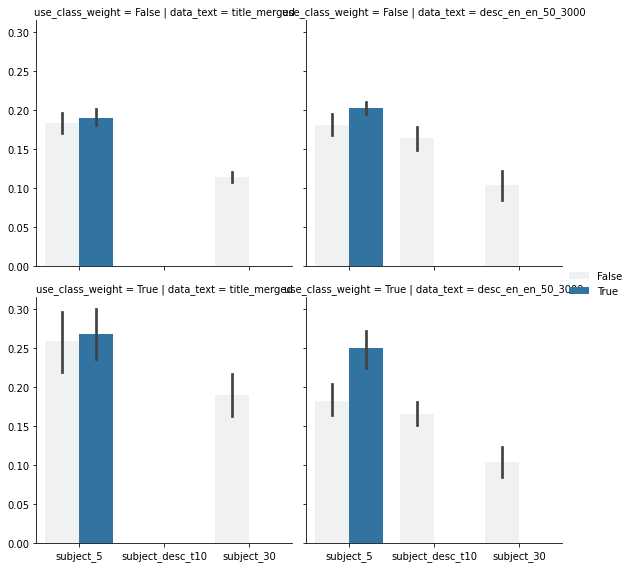

In [51]:
import seaborn as sns 
import matplotlib.pyplot as plt

model='6B.300d'
x = glove_eval_data_avg_across_runs.reset_index()
x = x[(x['finished'] == True) &
      (x['embedding_model_path'].str.contains(model)) &
      (x['data_text'] != 'desc_en_en')]

#display(x)
# x = x.groupby([
#     'run_dir_full', 'split', 'dataset', 'subject', 'text_col', 'meta_pipeline', 'use_class_weights'
# ]).mean()
x = x.reset_index()

for col in x.filter(regex='eval_[ml]'):
    print(col)
    g = sns.FacetGrid(data=x, col='data_text', height=4, aspect=1, row='use_class_weight')
    g.map_dataframe(sns.barplot, x='data_subject', y=col, hue='use_multioutput_wrapper', hue_order=[False, True], order=['subject_5', 'subject_desc_t10', 'subject_30'])
    g.add_legend()
    plt.show()

## Use class weight vs multioutput wrapper for all metrics

eval_micro-precision


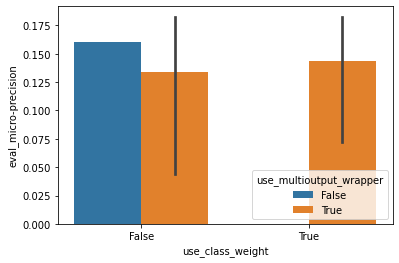

eval_micro-recall


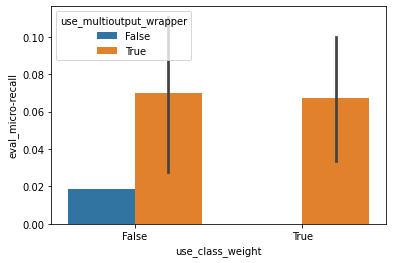

eval_micro-fb1


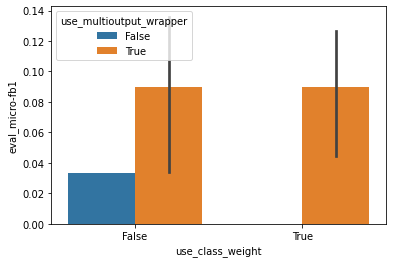

eval_macro-precision


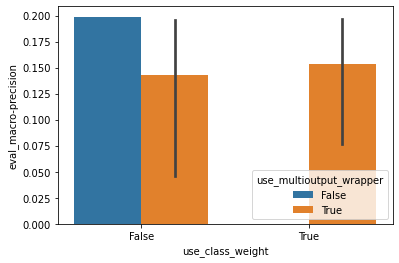

eval_macro-recall


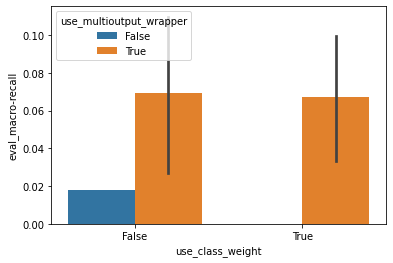

eval_macro-fb1


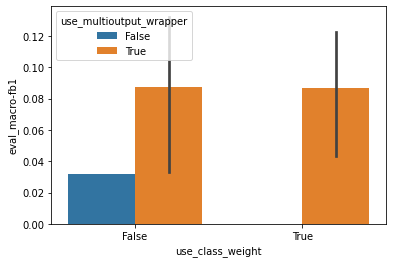

train_micro-precision


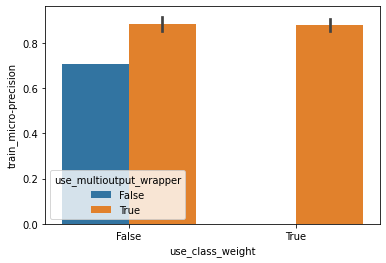

train_micro-recall


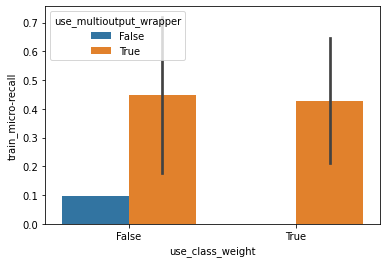

train_micro-fb1


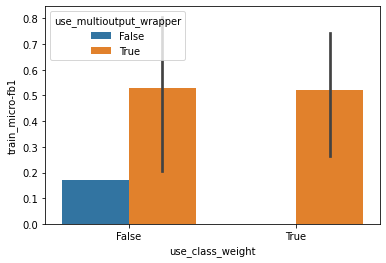

train_macro-precision


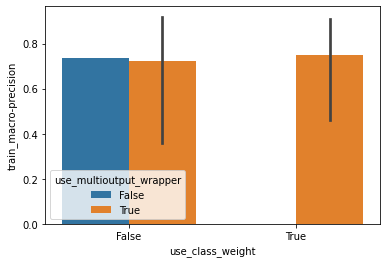

train_macro-recall


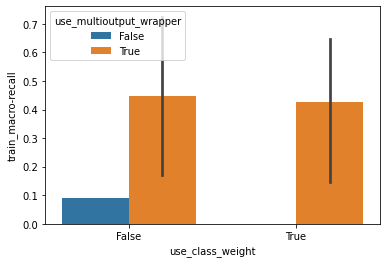

train_macro-fb1


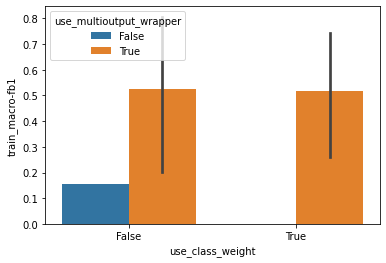

In [52]:
xx = x.reset_index()

for col in xx.filter(regex='(eval|train).*(micro|macro)').columns:
    print(col)
    sns.barplot(data=xx, y=col, x='use_class_weight', hue='use_multioutput_wrapper')#, ax=ax)
    #sns.barplot(data=xx, y='eval_macro-fb1', x=cols[i], ax=ax)
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    for ax in g.axes.flat:
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    plt.show()